In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [61]:
df=pd.read_csv("data/ti_cleaned.csv")
print df.head()

     FAKEID  Y2defect  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS  BACKER  \
0  580V74KT         0     0     0     1     1     1       15      8       1   
1  298S54OK         1     0     0     1     0     1       15      3       1   
2  268D25AO         1     1     0     0     0     1       15     11       1   
3  312Q12WV         1     1     0     1     0     1       15      4       0   
4  420R23VB         0     0     0     1     0     0       15      5       0   

   AGE  INCOME  GNDR  OWNHOME  SPORT  PCTMARR  HOMEVAL  
0   94       4     0        1      0       77      203  
1   63       3     0        0      0       53       68  
2   67       2     0        1      0       50       38  
3   62       4     1        1      0       60       68  
4   89       4     1        1      0       65      194  


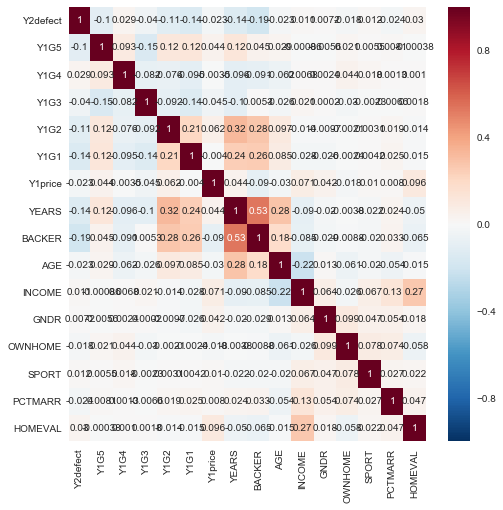

In [88]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [62]:
# declare X variables and y variable
y = df['Y2defect']
x = df.drop(['Y2defect','FAKEID'], axis=1)


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, random_state= 2)

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
# RandomForest
clf = RandomForestClassifier(n_estimators=15)    #building 15 decision trees
clf=clf.fit(x, y)
clf.score(x,y)

0.99555121527777779

In [65]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), x.columns))

Features sorted by their rank:
[(0.0071, 'SPORT'), (0.0178, 'OWNHOME'), (0.0191, 'Y1G2'), (0.0232, 'Y1G3'), (0.0249, 'Y1G4'), (0.0275, 'Y1G5'), (0.0299, 'GNDR'), (0.0331, 'Y1G1'), (0.0348, 'BACKER'), (0.0365, 'Y1price'), (0.082, 'INCOME'), (0.1234, 'YEARS'), (0.1602, 'AGE'), (0.1779, 'PCTMARR'), (0.2025, 'HOMEVAL')]


In [66]:
# another method
pd.DataFrame({'feature':x.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Y1G5,0.027550
1,Y1G4,0.024942
2,Y1G3,0.023194
3,Y1G2,0.019059
4,Y1G1,0.033078
5,Y1price,0.036519
6,YEARS,0.123407
7,BACKER,0.034799
8,AGE,0.160224
9,INCOME,0.082024


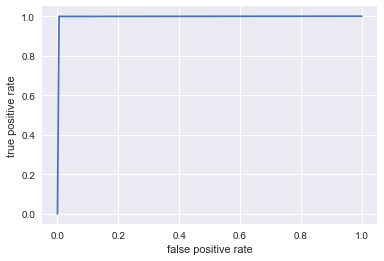

False-positive rate: [ 0.          0.00524934  1.        ]
True-positive rate:  [ 0.          0.99871383  1.        ]
AUC score:  0.996732241267


In [67]:
#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,clf.predict(x_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, clf.predict(x_test))

# KNN Model

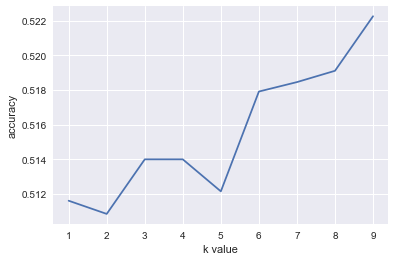

In [68]:
#KNN
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, x, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

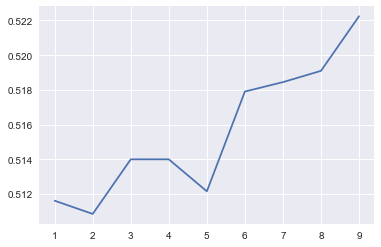

In [69]:
#KNN
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x, y)
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [70]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.522243923611
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


# Logistic Regression

In [71]:
# Logist Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
print metrics.accuracy_score(y_test, lr.predict(x_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(x_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(x_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(x_test))

0.602793114648
--------------------------------------------------------
[[926 598]
 [625 930]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.61      0.60      1524
          1       0.61      0.60      0.60      1555

avg / total       0.60      0.60      0.60      3079

--------------------------------------------------------
0.602841144053


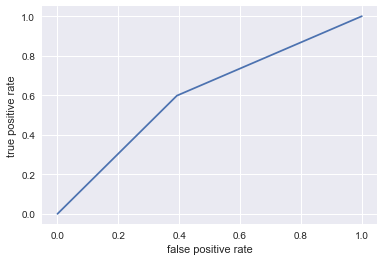

False-positive rate: [ 0.          0.39238845  1.        ]
True-positive rate:  [ 0.          0.59807074  1.        ]
AUC score:  0.602841144053


In [73]:
#This is ROC chart based on the testing dataset
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(x_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(x_test))

# Decosion Tree Model

In [74]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
print metrics.accuracy_score(y_test, dt.predict(x_test))
print metrics.confusion_matrix(y_test, dt.predict(x_test))

0.562845079571
[[837 687]
 [659 896]]


In [76]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.51952278  0.55639913  0.55531453  0.56073753  0.53579176  0.55639913
  0.56941432  0.56182213  0.55217391  0.56956522]
0.553714043195


In [77]:
# 1st option
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=x.columns)

# Traditional logit function

In [78]:

#declare X variables and y variable
Y1G5_dummies = pd.get_dummies(df['Y1G5'], prefix='Y1G5')
Y1G4_dummies = pd.get_dummies(df['Y1G4'], prefix='Y1G4')
Y1G3_dummies = pd.get_dummies(df['Y1G3'], prefix='Y1G3')
Y1G2_dummies = pd.get_dummies(df['Y1G2'], prefix='Y1G2')
Y1G1_dummies = pd.get_dummies(df['Y1G1'], prefix='Y1G1')
BACKER_dummies = pd.get_dummies(df['BACKER'], prefix='BACKER')
GNDR_dummies = pd.get_dummies(df['GNDR'], prefix='GNDR')
OWNHOME_dummies = pd.get_dummies(df['OWNHOME'], prefix='OWNHOME')
df_new = pd.concat([df, Y1G5_dummies, Y1G4_dummies, Y1G3_dummies, Y1G2_dummies, Y1G1_dummies, BACKER_dummies, GNDR_dummies, OWNHOME_dummies], axis=1)
df_new.head(1)
y1 = df_new['Y2defect']
x1 = df_new.drop(['Y2defect', 'Y1G5', 'Y1G4', 'Y1G3', 'Y1G2', 'Y1G1', 'BACKER', 'GNDR', 'OWNHOME',
                 'Y1G5_0', 'Y1G4_0', 'Y1G3_0', 'Y1G2_0', 'Y1G1_0','BACKER_0', 'GNDR_0', 'OWNHOME_0','FAKEID'], axis=1)


In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 33 columns):
FAKEID       9216 non-null object
Y2defect     9216 non-null int64
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
BACKER       9216 non-null int64
AGE          9216 non-null int64
INCOME       9216 non-null int64
GNDR         9216 non-null int64
OWNHOME      9216 non-null int64
SPORT        9216 non-null int64
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
Y1G5_0       9216 non-null uint8
Y1G5_1       9216 non-null uint8
Y1G4_0       9216 non-null uint8
Y1G4_1       9216 non-null uint8
Y1G3_0       9216 non-null uint8
Y1G3_1       9216 non-null uint8
Y1G2_0       9216 non-null uint8
Y1G2_1       9216 non-null uint8
Y1G1_0       9216 non-null uint8
Y1G1_1       9216 non-null uint8
B

In [80]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.334, random_state= 2)
dt = DecisionTreeClassifier()
dt.fit(x1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [81]:
print metrics.accuracy_score(y1_test, dt.predict(x1_test))
print metrics.confusion_matrix(y1_test, dt.predict(x1_test))

0.55829814875
[[828 696]
 [664 891]]


In [82]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, x1, y1, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.52169197  0.55422993  0.54989154  0.54880694  0.53904555  0.56073753
  0.56724512  0.57049892  0.55869565  0.57173913]
0.554258228803


In [83]:
# we use statsmodels for logit function
logit = sm.Logit(y1, x1) 
model_logit = logit.fit()
for i in model_logit.predict():
    print i

Optimization terminated successfully.
         Current function value: 0.664121
         Iterations 4
0.443900216638
0.394525702624
0.33590761727
0.456028152941
0.704643076337
0.648946019301
0.713186426338
0.468141989529
0.364902973659
0.479789849795
0.624944947262
0.608788020285
0.481004355491
0.692180154819
0.410428399602
0.708770247731
0.409936583299
0.631479544543
0.488679219225
0.453197666342
0.59559494002
0.447035561466
0.338790987309
0.244574294856
0.363030236382
0.631716846076
0.468337163574
0.635034846268
0.624217940796
0.473619923947
0.559931355438
0.455846215553
0.271781105907
0.537545975997
0.682174969285
0.350119890144
0.413830184045
0.517418150444
0.488153170394
0.368173418591
0.308526387411
0.325426032096
0.500229765195
0.364141969281
0.443471621029
0.646801181974
0.520015968649
0.439835421656
0.519959187835
0.385914680223
0.651874300329
0.428456282274
0.374620611321
0.418516673718
0.578396762596
0.590663455038
0.298139801497
0.576681369578
0.34472967242
0.273932364368
0

0.544355927844
0.408072559546
0.333661405581
0.489614519341
0.467360841892
0.513504363571
0.640859233132
0.526233168182
0.40292820911
0.598747145
0.693466197223
0.446626117537
0.263215778114
0.624196567895
0.494580599699
0.453946062491
0.456615540795
0.394651507324
0.378742859012
0.515332156837
0.656830363625
0.514426274089
0.711965012172
0.627793692635
0.688076208698
0.552822070223
0.506772050292
0.626922889621
0.606641143134
0.451308722404
0.415337610956
0.575570221769
0.653417048811
0.595994041428
0.663630482101
0.66209434587
0.276573860609
0.363775071168
0.410422798049
0.574946224573
0.309941315928
0.270915620184
0.684500764216
0.4444770726
0.424516760212
0.294850740997
0.397632821136
0.618742079911
0.621223556331
0.530666909452
0.333375771637
0.55889552865
0.621711441637
0.469579581043
0.53963783697
0.596213100626
0.377830058165
0.372752811771
0.396723641317
0.606793319553
0.391266185587
0.643915993809
0.541884147311
0.513444299336
0.432377315285
0.476064812137
0.623698337472
0.40

0.601717332195
0.436253063188
0.388160024386
0.449580637753
0.243849377069
0.523041735805
0.716544061676
0.458799216946
0.519953869118
0.499778828128
0.65566505351
0.56722634143
0.415328869838
0.356716379606
0.254048426165
0.515679120039
0.622254501603
0.39897249157
0.619127008996
0.43043068317
0.395027721302
0.545452153
0.603772316661
0.418481783901
0.323003714192
0.343304255785
0.431421636531
0.379697345468
0.624423093321
0.609103736098
0.591942854218
0.600658280864
0.355463423162
0.475419439653
0.475784029045
0.380039939276
0.679653134399
0.494980184635
0.376990752993
0.509754086381
0.451552533748
0.348813472065
0.580833702481
0.572530242433
0.715447446429
0.486529847732
0.673064065822
0.320338164242
0.351124950457
0.644293476857
0.580228879076
0.307646896042
0.507699766503
0.332625141908
0.604139011001
0.542773200865
0.409437501
0.504039004874
0.456587468703
0.534128081489
0.374044431239
0.26329300913
0.43823969428
0.334388475105
0.662228515365
0.630611706247
0.464543731116
0.61567

0.424366935492
0.46842501396
0.670878444436
0.676489613264
0.429085373018
0.286842834598
0.681438701712
0.623973517503
0.627096293875
0.524646646949
0.47271976119
0.621415296065
0.23744146681
0.54662654942
0.529323656528
0.678323116646
0.688763514443
0.517726010419
0.465119548346
0.376922353226
0.401549752668
0.596804024323
0.48121289494
0.306912599458
0.316496116546
0.644177235553
0.496014358597
0.396245404375
0.417061767882
0.622795262624
0.397303768582
0.54679784475
0.509517660796
0.504301724088
0.351582029905
0.426660868447
0.608256255023
0.496591951506
0.480288978448
0.399266255511
0.657922338811
0.599804097556
0.266869657329
0.337755408109
0.539350851955
0.388186692367
0.647117130645
0.521841920092
0.427241170152
0.317651067611
0.585288266022
0.459187285507
0.632397441203
0.381210172855
0.599721975653
0.645844580083
0.445257848401
0.528308159458
0.271274961592
0.366007354205
0.422336735117
0.356804955221
0.638485516988
0.494542273977
0.671993604705
0.392945388115
0.644137281379
0

0.483303861784
0.57905182122
0.401764597758
0.584874405386
0.427267486514
0.485135419843
0.474760167517
0.316168386574
0.604684950007
0.621078153887
0.394851528134
0.476732970239
0.467695602241
0.657255806062
0.513856370429
0.537290285038
0.617681466994
0.690523842405
0.579732355354
0.570010460385
0.334076464861
0.400046667825
0.626594179858
0.590673658323
0.537207151788
0.550950710322
0.661218224279
0.40770435192
0.509894771968
0.326593869098
0.370018684694
0.625549736106
0.402761857572
0.468130322631
0.579881129636
0.436310914854
0.668547240534
0.587056007839
0.523779984831
0.537025003165
0.562305515005
0.488644307486
0.294187707539
0.665133732139
0.326014608365
0.251258882633
0.469830186521
0.518188346899
0.550851313315
0.571512312702
0.337327478179
0.641569753074
0.403940350017
0.330388828013
0.511335365332
0.625498244159
0.531690640367
0.546342317223
0.514458938503
0.522523805634
0.522598273734
0.612285131731
0.590881237816
0.571026866297
0.616051195996
0.61137014481
0.32416702876

In [84]:
model_logit.pred_table()

array([[ 2839.,  1769.],
       [ 1943.,  2665.]])

- accuracy (2839+2665)/9216=0.59722

In [85]:
output_scoring = clf.predict(x)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted continue book'])
predicted_y 

,Predicted continue book
0,0
1,0
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1


In [86]:
y

0       0
1       1
2       1
3       1
4       0
5       1
6       1
7       0
8       1
9       1
10      1
11      0
12      1
13      1
14      0
15      1
16      0
17      1
18      1
19      1
20      0
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      0
       ..
9186    1
9187    0
9188    1
9189    1
9190    0
9191    0
9192    1
9193    0
9194    0
9195    1
9196    1
9197    0
9198    1
9199    1
9200    0
9201    1
9202    1
9203    0
9204    1
9205    1
9206    0
9207    1
9208    1
9209    1
9210    1
9211    1
9212    0
9213    1
9214    1
9215    0
Name: Y2defect, Length: 9216, dtype: int64

In [87]:
probs = clf.predict_proba(x)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])
probs

,prob of NO,prob of YES
0,0.866667,0.133333
1,0.533333,0.466667
2,0.200000,0.800000
3,0.066667,0.933333
4,0.933333,0.066667
5,0.066667,0.933333
6,0.200000,0.800000
7,0.800000,0.200000
8,0.400000,0.600000
9,0.066667,0.933333


# Feature selection

In [93]:
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,0,77,203


In [94]:
# declare X variables and y variable
y1 = df['Y2defect']
x1 = df.drop(['Y2defect','FAKEID','Y1G5','Y1G4','Y1G3','Y1G2','Y1G1','BACKER','OWNHOME','SPORT','GNDR','Y1price'], axis=1)
# YEARS, AGE, INCOME, PCTMARR, HOMEVAL SELECTED

In [95]:
from sklearn.ensemble import RandomForestClassifier
# RandomForest
clf = RandomForestClassifier(n_estimators=15)    #building 15 decision trees
clf=clf.fit(x1, y1)
clf.score(x1,y1)

0.9912109375

In [96]:
# declare X variables and y variable
y2 = df['Y2defect']
x2 = df.drop(['Y2defect','FAKEID','Y1G5','Y1G4','Y1G3','Y1G2','AGE','BACKER','OWNHOME','SPORT','GNDR','INCOME'], axis=1)

In [98]:
from sklearn.ensemble import RandomForestClassifier
# RandomForest
clf = RandomForestClassifier(n_estimators=15)    #building 15 decision trees
clf1=clf.fit(x2, y2)
clf1.score(x2,y2)

0.97016059027777779

# Data Development

In [99]:
score=pd.read_csv("data/sport_test.csv")
score.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,0.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,0.0,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,0,NaN,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,0.0,65,110


In [102]:
score_X = score.drop(['Y3defect','FAKEID','Y2G5','Y2G4','Y2G3','Y2G2','AGE','BACKER','OWNHOME','SPORT','GNDR','INCOME'], axis=1)
score_X.head(2)

,Y2G1,Y2price,YEARS,PCTMARR,HOMEVAL
0,0,15,5,66,64
1,1,25,9,67,128


In [109]:
output_scoring = clf1.predict(score_X)
predicted_y= pd.DataFrame(output_scoring, columns=['Y3defect'])
predicted_y

,Y3defect
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,1
8,0
9,0


In [111]:
probs = clf1.predict_proba(score_X)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])
probs

,prob of NO,prob of YES
0,0.933333,0.066667
1,0.733333,0.266667
2,0.266667,0.733333
3,0.333333,0.666667
4,0.733333,0.266667
5,0.466667,0.533333
6,0.933333,0.066667
7,0.400000,0.600000
8,0.866667,0.133333
9,0.600000,0.400000


In [112]:
Y3defect = predicted_y.join(probs)
Y3defect

,Y3defect,prob of NO,prob of YES
0,0,0.933333,0.066667
1,0,0.733333,0.266667
2,1,0.266667,0.733333
3,1,0.333333,0.666667
4,0,0.733333,0.266667
5,1,0.466667,0.533333
6,0,0.933333,0.066667
7,1,0.400000,0.600000
8,0,0.866667,0.133333
9,0,0.600000,0.400000
